In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import LearningRateScheduler
import os
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [6]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(x_train)

In [7]:
opt1= keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
#opt2 = keras.optimizers.SGD(lr=lr_schedule(0), momentum=0.9, nesterov=True)

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt1,
              metrics=['accuracy'])

In [9]:
batch_size = 32
epochs = 40
num_predictions = 20

In [10]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test,y_test),
                    callbacks=[LearningRateScheduler(lambda x: 1. / (1. + x))])

Epoch 1/40
1562/1562 [==============================] - 144s 92ms/step - loss: 14.4879 - acc: 0.1007 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/40
1562/1562 [==============================] - 149s 95ms/step - loss: 14.5109 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/40
1562/1562 [==============================] - 147s 94ms/step - loss: 14.5071 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/40
1562/1562 [==============================] - 150s 96ms/step - loss: 14.4896 - acc: 0.1010 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/40
1562/1562 [==============================] - 152s 97ms/step - loss: 14.5038 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/40
1562/1562 [==============================] - 150s 96ms/step - loss: 14.5074 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/40
1562/1562 [==============================] - 143s 91ms/step - loss: 14.5132 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/40
1562/1562 [=====

In [11]:
from sklearn.metrics import classification_report
classNames =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test, predictions, target_names=classNames))

             precision    recall  f1-score   support

   airplane       0.00      0.00      0.00      1000
 automobile       0.00      0.00      0.00      1000
       bird       0.00      0.00      0.00      1000
        cat       0.10      1.00      0.18      1000
       deer       0.00      0.00      0.00      1000
        dog       0.00      0.00      0.00      1000
       frog       0.00      0.00      0.00      1000
      horse       0.00      0.00      0.00      1000
       ship       0.00      0.00      0.00      1000
      truck       0.00      0.00      0.00      1000

avg / total       0.01      0.10      0.02     10000



/home/iampukar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


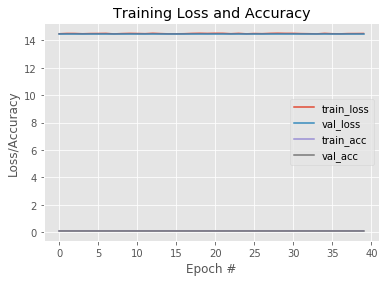

In [12]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), hist.history["acc"], label="train_acc")
plt.plot(np.arange(0, epochs), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()